#NATURAL LANGUAGE PROCESSING PROJECT - 2

#CLASSIFY YELP REVIEWS INTO 1 START AND 5 STAR CATEGORIES

I will use the Yelp Review Data Set from Kaggle.

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

#IMPORTS

In [1]:
#Import Numpy And Pandas
import numpy as np
import pandas as pd

In [3]:
#Import Matplotlib And Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Import nltk
import nltk

#THE DATA

In [8]:
#Read the yelp.csv file in a dataframe
df = pd.read_csv('yelp.csv')

In [10]:
#Head Of df
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [12]:
#Info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [14]:
#Describe on df
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [16]:
#Creating a new column that contains length of text in df
df['text length']=df['text'].apply(len)

In [18]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


#EXPLORATORY DATA ANALYSIS

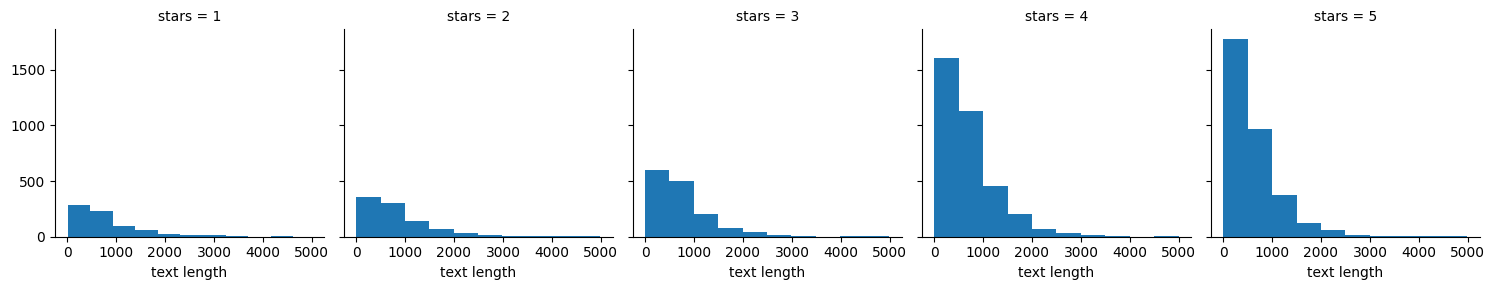

In [39]:
#Histogram Of text length based off stars rating
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'text length')

C:\Users\Shaurya Mittal\AppData\Local\Temp\ipykernel_15816\1651871087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='text length',x='stars',palette='rainbow')


<Axes: xlabel='stars', ylabel='text length'>

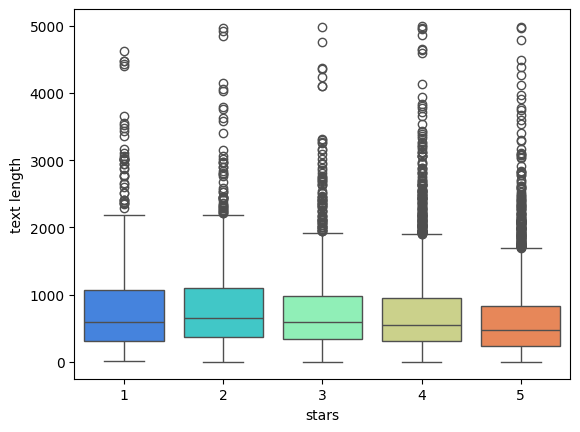

In [52]:
#Boxplot Of text length based off stars rating
sns.boxplot(data=df,y='text length',x='stars',palette='rainbow')

<Axes: xlabel='stars', ylabel='count'>

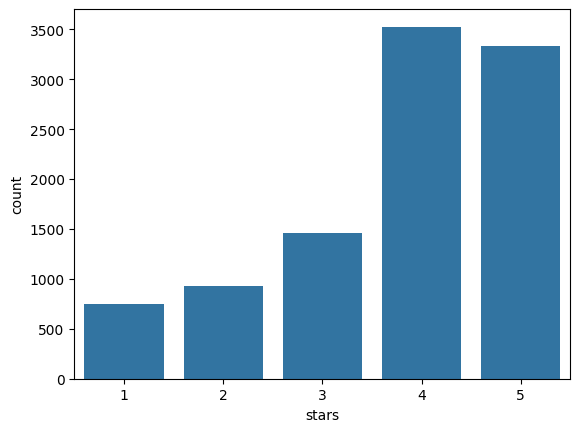

In [56]:
#Countplot of the number of occurrences for each type of star rating
sns.countplot(data=df,x='stars')

In [74]:
#Mean values of numerical columns for each star category
selected_features = ['cool', 'useful', 'funny', 'text length']
valuess = []
new_df = pd.DataFrame()
for i in selected_features:
    for j in range(1,6):
        valuess.append(df[df['stars']==j][i].mean())
    new_df[i]=valuess
    valuess = []
new_df['stars']=range(1,6)
new_df.set_index('stars')    

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [78]:
#Use corr() on new_df
new_df.corr()

,cool,useful,funny,text length,stars
cool,1.000000,-0.743329,-0.944939,-0.857664,0.964758
useful,-0.743329,1.000000,0.894506,0.699881,-0.761288
funny,-0.944939,0.894506,1.000000,0.843461,-0.950389
text length,-0.857664,0.699881,0.843461,1.000000,-0.950171
stars,0.964758,-0.761288,-0.950389,-0.950171,1.000000


<Axes: >

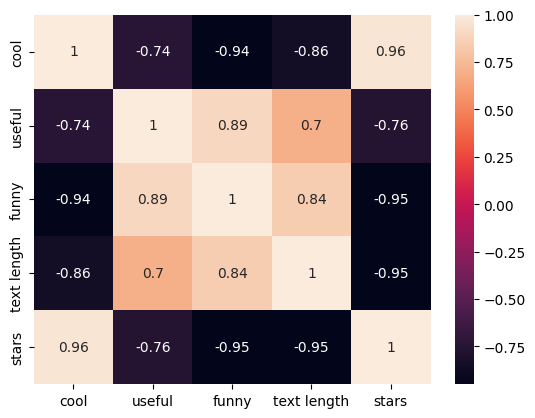

In [82]:
#Make a heatmap on new_df.corr()
sns.heatmap(new_df.corr(),annot=True)

#NLP CLASSIFICATION TASK

In [85]:
df['text']

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9995    First visit...Had lunch here today - used my G...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 10000, dtype: object

In [93]:
#Dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.
yelp_class = df[(df['stars']==1)|(df['stars']==5)]

In [99]:
#Make x and y
x = yelp_class['text']
y = yelp_class['stars']
print(x)
print(y)

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
6       Drop what you're doing and drive here. After I...
                              ...                        
9990    Yes I do rock the hipster joints.  I dig this ...
9991    Only 4 stars? \n\n(A few notes: The folks that...
9992    I'm not normally one to jump at reviewing a ch...
9994    Let's see...what is there NOT to like about Su...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 4086, dtype: object
0       5
1       5
3       5
4       5
6       5
       ..
9990    5
9991    5
9992    5
9994    5
9999    5
Name: stars, Length: 4086, dtype: int64


In [101]:
#Import CountVectorizer and create a CountVectorizer object
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [103]:
#Fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X
x = cv.fit_transform(x)

#TRAIN TEST SPLIT

In [106]:
#Import train_test_split
from sklearn.model_selection import train_test_split

In [108]:
#Apply train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

#TRAINING A MODEL

In [113]:
#Import MultinomialNB and create an instance of the estimator and call it nb
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [115]:
#Fit nb using training data
nb.fit(x_train,y_train)

MultinomialNB()

#PREDICTIONS AND EVALUATIONS

In [122]:
#Predict on testing data
predictions = nb.predict(x_test)

In [124]:
#Import Classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [126]:
#Evaluation of model
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



#USING TEXT PROCESSING

In [129]:
#Import tfidf transformer
from sklearn.feature_extraction.text import TfidfTransformer

In [133]:
#Import Pipeline
from sklearn.pipeline import Pipeline

In [137]:
#Create a pipeline
pipeline = Pipeline([
    ('P1',CountVectorizer()),
    ('P2',TfidfTransformer()),
    ('P3',MultinomialNB())
])

In [149]:
#Restoration of data
x = df['text']
y = df['stars']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [153]:
#Fit Pipeline
pipeline.fit(x_train,y_train)

Pipeline(steps=[('P1', CountVectorizer()), ('P2', TfidfTransformer()),
                ('P3', MultinomialNB())])

#PREDICTIONS AND EVALUATIONS

In [156]:
#Predictions from pipeline
pred_i = pipeline.predict(x_test)

In [160]:
#Making new classiclassification_report and cconfusion_matrix
print(classification_report(y_test,pred_i))
print('\n')
print(confusion_matrix((y_test,pred_i)))

C:\Users\Shaurya Mittal\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shaurya Mittal\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shaurya Mittal\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       243
           2       0.00      0.00      0.00       291
           3       0.00      0.00      0.00       482
           4       0.39      0.93      0.55      1179
           5       0.67      0.29      0.41      1105

    accuracy                           0.43      3300
   macro avg       0.21      0.24      0.19      3300
weighted avg       0.36      0.43      0.33      3300





TypeError: missing a required argument: 'y_pred'